In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Возьмём матрицу $A=\begin{bmatrix}1 & 1 \\ 0 & \sqrt{\varepsilon}\end{bmatrix}$. Найдём её сингулярные числа двумя способами: как собственные числа матрицы $B=A^T A$ и через встроенную функцию numpy.linalg.svd, принцип работы которой нам пока непонятен.

In [ ]:
k = 8
A = np.array([[1,1],[0,10**(-k)]])
B = A.T @ A
lambdas = np.linalg.eigh(B)[0]
lambdas = np.sqrt(lambdas)
lambdas = np.sort(lambdas)[::-1]

U, s, V = np.linalg.svd(A)

print(lambdas)
print(s)

[1.41421356 0.        ]
[1.41421356e+00 7.07106781e-09]


Видим, что при нахождении собственных чисел (замечу, что мы тоже не очень понимаем как numpy их ищет) происходит ошибка округления. А вот встроенная функция как-то обходит эту проблему, мы это подробнее обсудим во второй половине курса.

Давайте посмотрим ещё, что происходит при плавном изменении $\varepsilon$.

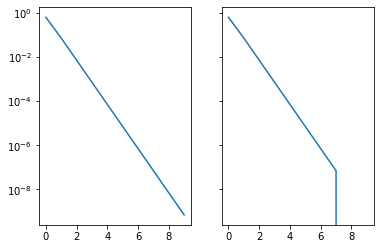

In [ ]:
lambda_second = []
svd_second = []

for k in range(0,10):
  A = np.array([[1,1],[0,10**(-k)]])
  B = A.T @ A
  lambdas = np.linalg.eigh(B)[0]
  lambdas = np.sqrt(lambdas)
  lambdas = np.sort(lambdas)[::-1]
  lambda_second.append(lambdas[1])

  U, s, V = np.linalg.svd(A)
  svd_second.append(s[1])

figure, axis = plt.subplots(1,2, sharey=True)
axis[0].semilogy(svd_second)
axis[1].semilogy(lambda_second)

Видим, что начиная с достаточно малого $\varepsilon$ внезапно точность пропадает.

---

$$
\begin{pmatrix}
1/1 & 1/2 & 1/3 \\
1/2 & 1/3 & 1/4 \\
1/3 & 1/4 & 1/5
\end{pmatrix}
$$

Рассмотрим матрицу Гильберта.

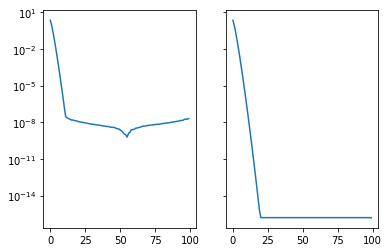

In [ ]:
m, n = 100, 100

ii, jj = np.meshgrid(np.arange(m), np.arange(n))

A = 1.0 / (ii + jj + 1)
B = A.T @ A
lambdas = np.linalg.eigh(B)[0]
lambdas = np.abs(lambdas)
lambdas = np.sqrt(lambdas)[::-1]

U, s, V = np.linalg.svd(A)

#print(lambdas)
#print(s)

figure, axis = plt.subplots(1,2, sharey=True)
axis[0].semilogy(lambdas)
axis[1].semilogy(s)

Кто прав? (слева -- корни из собственных чисел $A^T A$, справа -- сингулярные числа $A$, посчитанные через np.linalg.svd).

Правда на правой картинке -- эти числа близки к нулю. А на картинке слева мы видим, что собственные числа примерно равны нулю, а дальше из них берётся корень -- и они от этого резко портятся. Так что эта красивая кривая никакого отношения к реальности, вероятно, не имеет, это просто корень из шума. Так что проблема этого подхода не только в <<возведении в квадрат>> (нахождении $A^T A$), но и, наоборот, взятии корня.